In [8]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/content/chatgpt1.csv')


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn import metrics
from sklearn.cluster import KMeans

In [59]:
def summary(df):
    summary = pd.DataFrame(df.dtypes, columns = ['dtypes'])
    summary = summary.reset_index()
    summary['missing'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values
    return summary

summary(df)

,index,dtypes,missing,Uniques
0,Datetime,object,0,44
1,Tweet Id,int64,0,44
2,Text,object,0,44
3,Username,object,0,40
4,Permalink,object,0,44
5,User,object,0,40
6,Outlinks,object,0,44
7,CountLinks,object,0,44
8,ReplyCount,int64,0,6
9,RetweetCount,int64,0,6


In [62]:
df.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,...,QuotedTweet,MentionedUsers,hashtag,hastag_counts,Hashtags,User ID,Retweets,Likes,Replies,Engagement
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1,forbesTech,NaN,0,0,4,4
392,2023-01-22 14:08:23+00:00,1617162263273607169,@OpenAI ChatGPT does! https://t.co/MlMO00Vg8A ...,Why_So_Trill,https://twitter.com/Why_So_Trill/status/161716...,https://twitter.com/Why_So_Trill,['https://twitter.com/vcrussell/status/1617154...,['https://t.co/MlMO00Vg8A'],0,0,...,https://twitter.com/VCRussell/status/161715463...,"[User(username='OpenAI', id=4398626122, displa...",[],0,NaN,NaN,0,0,1,1
1120,2023-01-22 14:44:37+00:00,1617171380306329601,"Mieux que la chatgpt, le chat CGT dit les Term...",gregors_mac,https://twitter.com/gregors_mac/status/1617171...,https://twitter.com/gregors_mac,['https://twitter.com/vinceflibustier/status/1...,['https://t.co/yspDUyMhZj'],1,0,...,https://twitter.com/vinceflibustier/status/161...,"[User(username='ManaProd', id=7097744297866772...",[],0,NaN,NaN,0,0,1,1
1209,2023-01-22 14:49:03+00:00,1617172498822447105,RT:(@ForbesTech): Generative AI ChatGPT Is Goi...,yova,https://twitter.com/yova/status/16171724988224...,https://twitter.com/yova,['https://www.forbes.com/sites/lanceeliot/2023...,"['https://t.co/iQt3grQJTd', 'https://t.co/xHu8...",0,0,...,https://twitter.com/ForbesTech/status/16171696...,"[User(username='ForbesTech', id=14885549, disp...","['#weatherguy', '#forbesTech', '#technology', ...",4,NaN,NaN,0,0,1,1
1424,2023-01-22 15:00:11+00:00,1617175299195830273,BREAKTHROUGH!\n$GM implications\n\nChatGPT clo...,ConnectingODots,https://twitter.com/ConnectingODots/status/161...,https://twitter.com/ConnectingODots,['https://twitter.com/GRDecter/status/16171631...,['https://t.co/BECBeuc4qv'],4,4,...,https://twitter.com/GRDecter/status/1617163150...,"[User(username='mtbarra', id=1219824320, displ...",['#MaryLed'],1,NaN,NaN,0,0,1,1


In [63]:
df.tail()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,...,QuotedTweet,MentionedUsers,hashtag,hastag_counts,Hashtags,User ID,Retweets,Likes,Replies,Engagement
42689,2023-01-24 00:50:38+00:00,1617686278904123392,"$RNDR 的催化剂不仅仅是ChatGPT或APPLE,更重要的是可能的经济模型质变，让我们...",digitalhk678,https://twitter.com/digitalhk678/status/161768...,https://twitter.com/digitalhk678,['https://twitter.com/digitalhk678/status/1615...,['https://t.co/Uc9y5aHcHG'],1,0,...,https://twitter.com/digitalhk678/status/161572...,"[User(username='RenderToken', id=9004872363150...",[],0,NaN,NaN,0,0,1,1
43480,2023-01-24 01:33:51+00:00,1617697154340126725,A major problem with @ChatGPT is that it does ...,gracielagon,https://twitter.com/gracielagon/status/1617697...,https://twitter.com/gracielagon,['https://twitter.com/ProfNoahGian/status/1617...,['https://t.co/QotcjnrLGd'],1,1,...,https://twitter.com/ProfNoahGian/status/161727...,"[User(username='ChatGPT', id=15981842566262988...",[],0,NaN,NaN,0,0,1,1
44554,2023-01-24 02:32:20+00:00,1617711871674679296,[9/10] My favourite is this AI policy develope...,marekkowal,https://twitter.com/marekkowal/status/16177118...,https://twitter.com/marekkowal,['https://twitter.com/emollick/status/16155622...,['https://t.co/ruJMxuJokv'],1,0,...,https://twitter.com/emollick/status/1615562253...,"[User(username='emollick', id=39125788, displa...",[],0,NaN,NaN,0,0,1,1
46911,2023-01-24 04:25:48+00:00,1617740426953527296,"Also...found this, while asking ChatGPT @OpenA...",AlexFrapart,https://twitter.com/AlexFrapart/status/1617740...,https://twitter.com/AlexFrapart,['https://twitter.com/TreadHQ/status/161761727...,['https://t.co/TJq9t6UzJ6'],0,0,...,https://twitter.com/TreadHQ/status/16176172762...,"[User(username='OpenAI', id=4398626122, displa...",['#ChatGPT'],1,NaN,NaN,0,0,2,2
48135,2023-01-24 05:26:38+00:00,1617755736679026688,Max supply not changeable without consensus (s...,kie_v7,https://twitter.com/kie_v7/status/161775573667...,https://twitter.com/kie_v7,['https://github.com/bitcoin/bitcoin/blob/a622...,"['https://t.co/L93bZr9VTj', 'https://t.co/cMpb...",0,0,...,https://twitter.com/danheld/status/16161121428...,"[User(username='OpenAI', id=4398626122, displa...",[],0,NaN,NaN,0,0,1,1


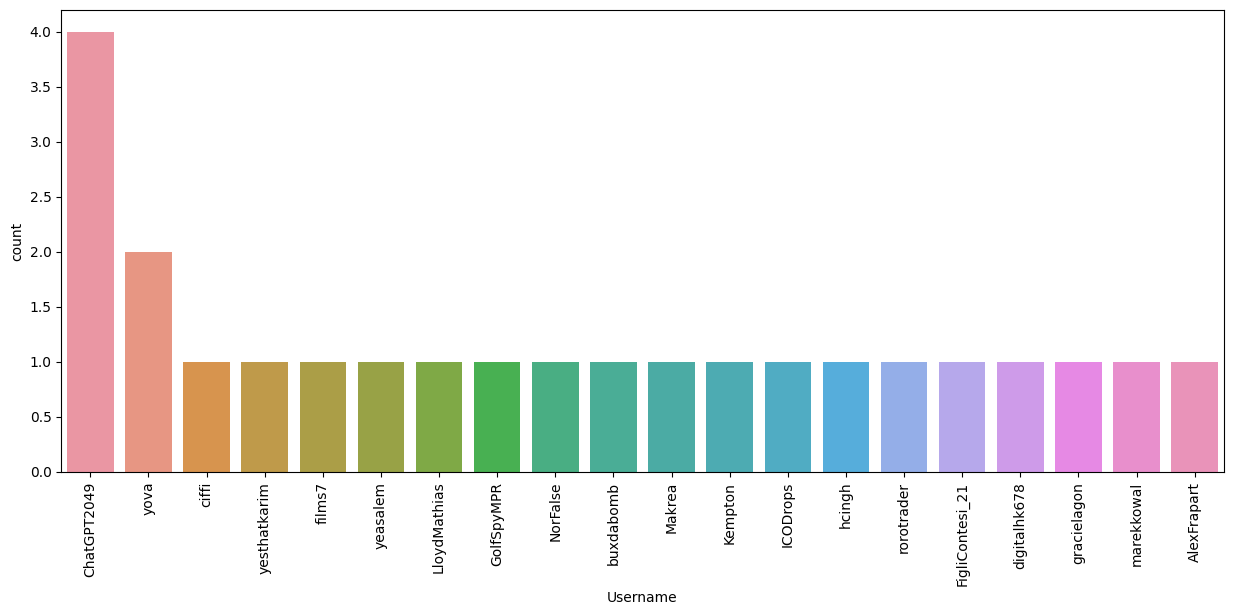

In [64]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Username', order=df["Username"].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

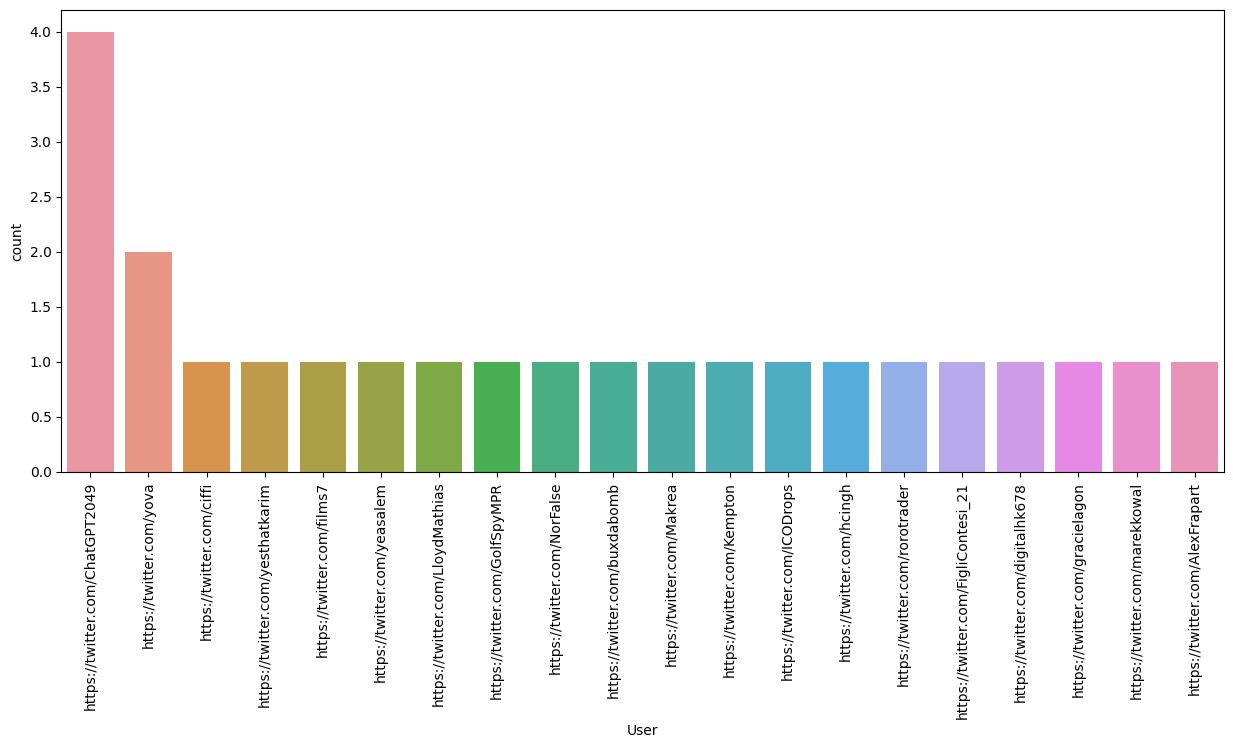

In [65]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='User', order=df["User"].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

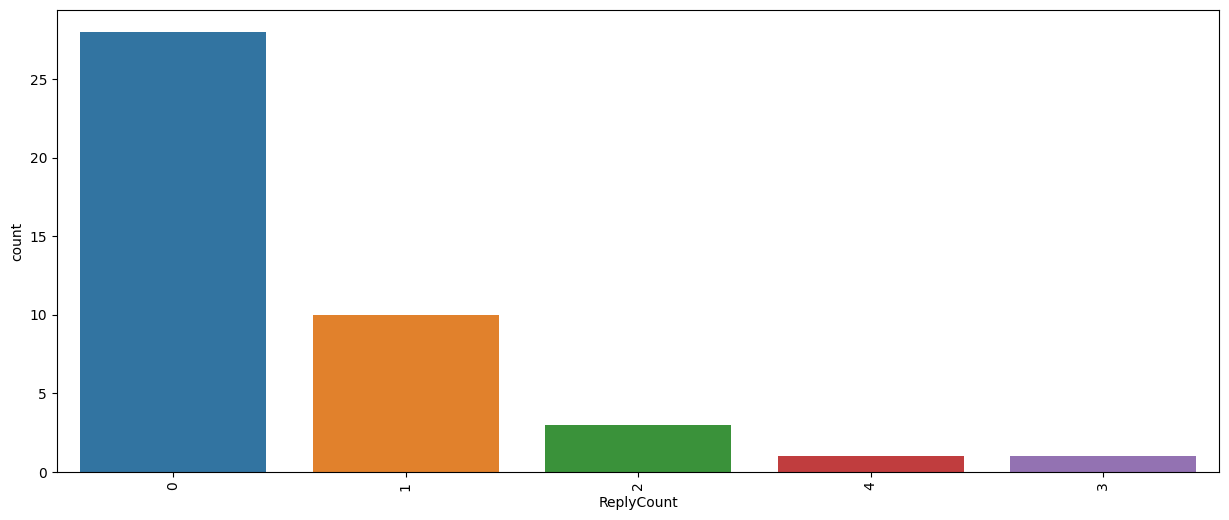

In [66]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='ReplyCount', order=df["ReplyCount"].value_counts().index[:5])
plt.xticks(rotation=90)
plt.show()

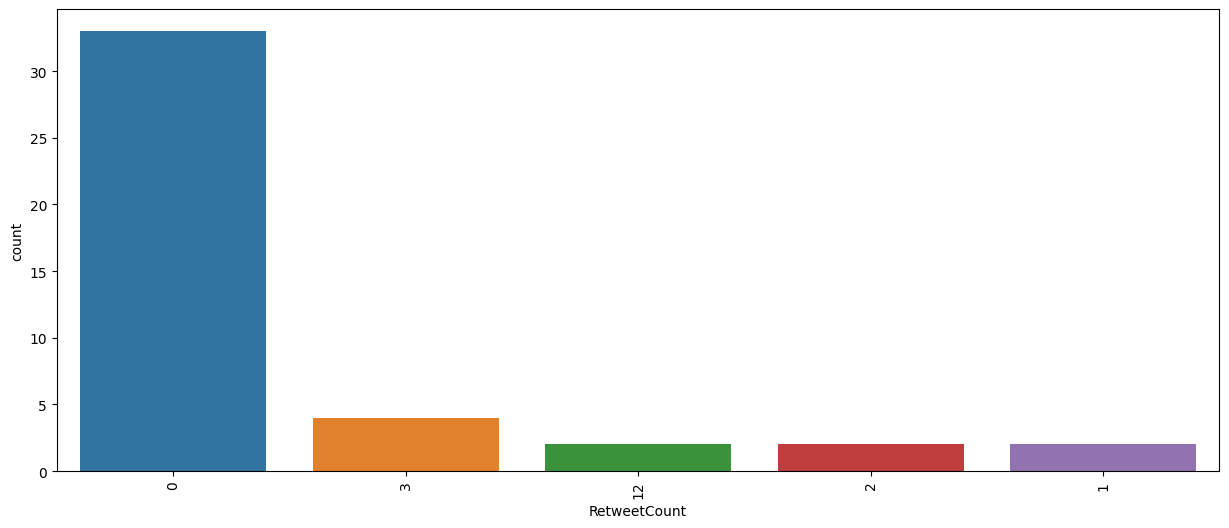

In [67]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='RetweetCount', order=df["RetweetCount"].value_counts().index[:5])
plt.xticks(rotation=90)
plt.show()

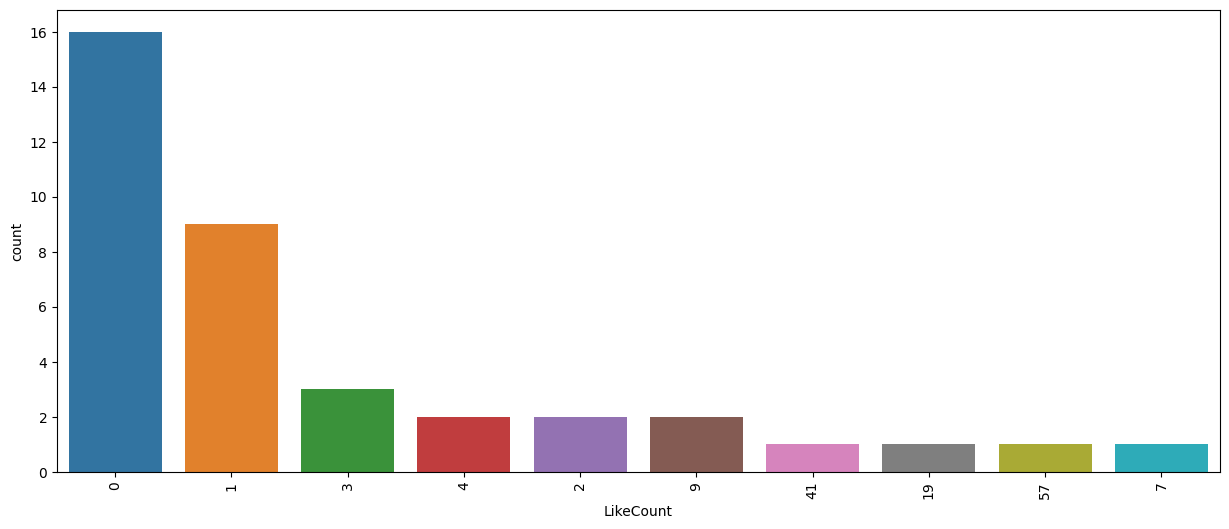

In [68]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='LikeCount', order=df["LikeCount"].value_counts().index[:10])
plt.xticks(rotation=90)
plt.show()

In [9]:
# Clean the data
df = df.dropna()
df = df.drop_duplicates()

In [22]:
df['Hashtags'] = df['Text'].str.extract(r'#(\w+)')

In [37]:
df['Retweets'] = df['Text'].str.count('RT @')
df['Likes'] = df['Text'].str.count('❤️')
df['Replies'] = df['Text'].str.count('@')

In [25]:
# Add a new column for the user ID
df['User ID'] = df['User'].str.extract(r'(.+?)\s')

In [10]:
# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Language'], test_size=0.25)

In [12]:
# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [15]:
# Train the supervised machine learning models
clf_logistic = LogisticRegression()
clf_knn = KNeighborsClassifier()
clf_nb = MultinomialNB()
clf_rf = RandomForestClassifier()

clf_logistic.fit(X_train_vectorized, y_train)
clf_knn.fit(X_train_vectorized, y_train)
clf_nb.fit(X_train_vectorized, y_train)
clf_rf.fit(X_train_vectorized, y_train)

RandomForestClassifier()

In [16]:
# Evaluate the performance of the supervised machine learning models
y_pred_logistic = clf_logistic.predict(X_test_vectorized)
y_pred_knn = clf_knn.predict(X_test_vectorized)
y_pred_nb = clf_nb.predict(X_test_vectorized)
y_pred_rf = clf_rf.predict(X_test_vectorized)

print('Logistic Regression accuracy:', accuracy_score(y_test, y_pred_logistic))
print('K-Nearest Neighbors accuracy:', accuracy_score(y_test, y_pred_knn))
print('Multinomial Naive Bayes accuracy:', accuracy_score(y_test, y_pred_nb))
print('Random Forest accuracy:', accuracy_score(y_test, y_pred_rf))

Logistic Regression accuracy: 0.7272727272727273
K-Nearest Neighbors accuracy: 0.8181818181818182
Multinomial Naive Bayes accuracy: 0.7272727272727273
Random Forest accuracy: 0.7272727272727273


In [17]:
# Apply K-Means clustering to the text data
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(X_train_vectorized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
# Evaluate the performance of the K-Means clustering algorithm
from sklearn.metrics import silhouette_score
silhouette_score = silhouette_score(X_train_vectorized, labels)

# Print the silhouette score
print('Silhouette score:', silhouette_score)

Silhouette score: 0.018469383017379205


In [23]:
# Perform hashtag analysis
hashtag_counts = df['Hashtags'].value_counts()

In [24]:
# Print the top 10 hashtags
for hashtag, count in hashtag_counts.head(10).items():
    print(hashtag, count)

ChatGPT 10
weatherguy 2
MaryLed 1
algoritmo 1
LLM 1
PineapplePepper 1
EconomíaYMercado 1
ensdomain 1
Politique 1
Algorand 1


In [26]:

# Train the KNN model
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train_vectorized, y_train)


KNeighborsClassifier()

In [27]:
# Predict the labels for the test set
y_pred_knn = clf_knn.predict(X_test_vectorized)

In [29]:
# Calculate the precision score using the weighted averaging setting
print('KNN precision (weighted):', precision_score(y_test, y_pred_knn, average='weighted'))

KNN precision (weighted): 0.6919191919191919


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# Evaluate the performance of the KNN model
print('KNN accuracy:', accuracy_score(y_test, y_pred_knn))

KNN accuracy: 0.8181818181818182


In [32]:
# Apply K-Means clustering to the text data
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(X_train_vectorized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
# Evaluate the performance of the K-Means clustering algorithm
from sklearn.metrics import silhouette_score
silhouette_score = silhouette_score(X_train_vectorized, labels)


In [38]:
# Create a new column for the engagement metrics
df['Engagement'] = df['Retweets'] + df['Likes'] + df['Replies']

In [39]:
# Train a logistic regression model to predict the engagement metrics
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression()

In [40]:
# Predict the engagement metrics for the test set
y_pred_model = model.predict(X_test_vectorized)

In [42]:
# Evaluate the performance of the logistic regression model

print('Logistic regression precision:', precision_score(y_test, y_pred_model, average='micro'))


Logistic regression precision: 0.7272727272727273


In [73]:
sia = SentimentIntensityAnalyzer()

def find_sentiment(post):
    try:
        if sia.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"

LookupError: ignored